# [Exercise 3](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E03_overfit_regularization.ipynb)

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
tips_raw = seaborn.load_dataset('tips')
tips_raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 0

### a)

In [3]:
tips_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips_raw.describe().T.drop('count', axis='columns')

,mean,std,min,25%,50%,75%,max
total_bill,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
tips_dropped_unusable_columns = tips_raw[["total_bill", "tip", "size"]]
tips_dropped_unusable_columns

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


### b)

In [6]:
def plot_descriptive_data(ax, column_name, descriptive_data):
    seaborn.barplot(
        ax=ax, x=descriptive_data.index, y=descriptive_data.values
    ).set_title(f"Descriptive statistics: {column_name}")

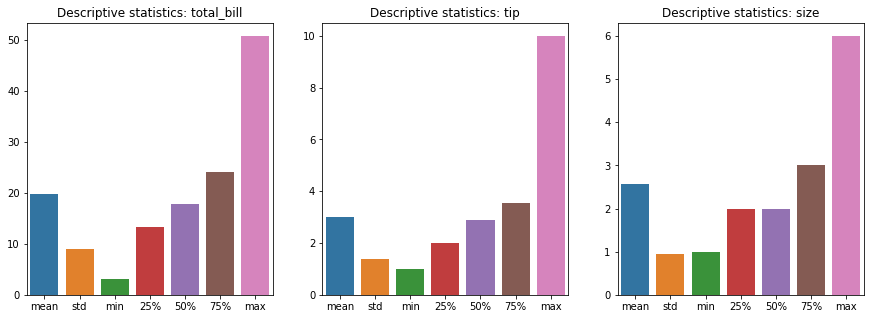

In [7]:
fig, axes = pyplot.subplots(1,3, figsize=(15,5))

for index, column in enumerate(tips_dropped_unusable_columns.columns):
    plot_descriptive_data(axes[index], column, tips_dropped_unusable_columns[column].describe().drop("count"))

### c)

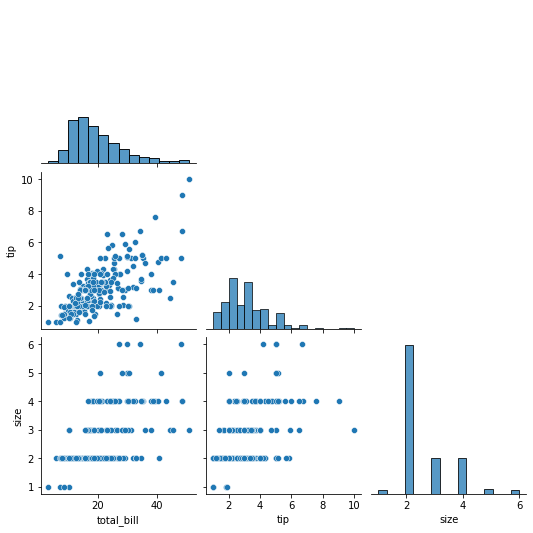

In [8]:
seaborn.pairplot(tips_dropped_unusable_columns, corner=True)

### d)

- There are few tables with one person and they seem to tip less to, maybe because of group pressure?
- It seems that if the bill is higher the tips also is higher, maybe because people tip percentages of their bill?
- There also seems to be a linearity between tip and total_bill tho there is quite a high variance

## 1

### a)

In [9]:
tips_dropped_unusable_columns

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [10]:
X, y = tips_dropped_unusable_columns.drop('tip', axis=1), tips_dropped_unusable_columns['tip']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2

In [16]:
def feature_standardization(X_train, X_test):
    X_train_mean = X_train.mean()
    X_train_std = X_train.std()
    scaled_X_train = (X_train - X_train_mean) / X_train_std
    scaled_X_test = (X_test - X_train_mean) / X_train_std
    return scaled_X_train, scaled_X_test

scaled_X_train, scaled_X_test = feature_standardization(X_train, X_test)

scaled_X_train.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
total_bill,6.791953e-17,1.0,-1.603041,-0.758769,-0.271139,0.533230,3.356916
size,-1.985340e-16,1.0,-1.694634,-0.623676,-0.623676,0.447283,3.660158


In [17]:
scaled_X_test.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
total_bill,-0.191380,0.924957,-1.898040,-0.804175,-0.303061,0.229424,3.066319
size,-0.044779,1.066389,-1.694634,-0.623676,-0.623676,0.447283,3.660158


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sklearn_scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

sklearn_scaled_X_train[:,0].mean(), sklearn_scaled_X_train[:,0].std()

(6.791952621236252e-17, 1.0)

## 3

In [20]:
model_polynomial_second_degree = PolynomialFeatures(2, include_bias=False)
transformed_X_train = model_polynomial_second_degree.fit_transform(scaled_X_train.to_numpy())
transformed_X_test = model_polynomial_second_degree.transform(scaled_X_test.to_numpy())
fit_transformed_X_test = model_polynomial_second_degree.fit_transform(scaled_X_test.to_numpy())

numpy.sum(transformed_X_test == fit_transformed_X_test)

370

In [28]:
transformed_X_test.shape[0] * transformed_X_test.shape[1]

370